In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from utils import *

In [175]:
eth=pd.read_csv('resources/coin_Ethereum.csv')
solana=pd.read_csv('resources/coin_Solana.csv')

Text(0.5, 1.0, 'Solana')

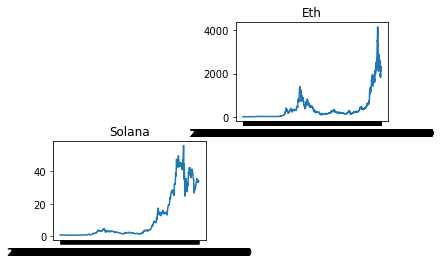

In [141]:
plt.subplot(2,2,2)
plt.plot(eth['Date'],eth['Close'])
plt.title('Eth')
plt.subplot(2,2,3)
plt.plot(solana['Date'],solana['Close'])
plt.title('Solana')

In [35]:
display(eth)
display(solana)

SNo      Name Symbol                 Date         High          Low  \
0        1  Ethereum    ETH  2015-08-08 23:59:59     2.798810     0.714725   
1        2  Ethereum    ETH  2015-08-09 23:59:59     0.879810     0.629191   
2        3  Ethereum    ETH  2015-08-10 23:59:59     0.729854     0.636546   
3        4  Ethereum    ETH  2015-08-11 23:59:59     1.131410     0.663235   
4        5  Ethereum    ETH  2015-08-12 23:59:59     1.289940     0.883608   
...    ...       ...    ...                  ...          ...          ...   
2155  2156  Ethereum    ETH  2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH  2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum    ETH  2021-07-04 23:59:59  2384.286857  2190.837703   
2158  2159  Ethereum    ETH  2021-07-05 23:59:59  2321.922836  2163.041394   
2159  2160  Ethereum    ETH  2021-07-06 23:59:59  2346.294874  2197.919385   

             Open        Close        Volume     Marketcap  
0        2.793760     0.753325  6.741880e+05  4.548689e+07  
1        0.706136     0.701897  5.321700e+05  4.239957e+07  
2        0.713989     0.708448  4.052830e+05  4.281836e+07  
3        0.708087     1.067860  1.463100e+06  6.456929e+07  
4        1.058750     1.217440  2.150620e+06  7.364501e+07  
...           ...          ...           ...           ...  
2155  2109.892677  2150.040364  3.179621e+10  2.505527e+11  
2156  2150.835025  2226.114282  1.743336e+10  2.594475e+11  
2157  2226.550382  2321.724112  1.878711e+10  2.706217e+11  
2158  2321.922836  2198.582464  2.010379e+10  2.562978e+11  
2159  2197.919385  2324.679449  2.089186e+10  2.710286e+11  

[2160 rows x 10 columns]

SNo    Name Symbol                 Date       High        Low       Open  \
0      1  Solana    SOL  2020-04-11 23:59:59   1.049073   0.765020   0.951054   
1      2  Solana    SOL  2020-04-12 23:59:59   0.956670   0.762426   0.785448   
2      3  Solana    SOL  2020-04-13 23:59:59   0.891603   0.773976   0.890760   
3      4  Solana    SOL  2020-04-14 23:59:59   0.796472   0.628169   0.777832   
4      5  Solana    SOL  2020-04-15 23:59:59   0.704964   0.621531   0.669289   
..   ...     ...    ...                  ...        ...        ...        ...   
447  448  Solana    SOL  2021-07-02 23:59:59  34.031786  31.479924  33.306310   
448  449  Solana    SOL  2021-07-03 23:59:59  35.404770  33.298475  34.015575   
449  450  Solana    SOL  2021-07-04 23:59:59  35.502372  33.555737  34.495117   
450  451  Solana    SOL  2021-07-05 23:59:59  34.461824  32.482692  34.282550   
451  452  Solana    SOL  2021-07-06 23:59:59  34.978319  32.930307  32.930307   

         Close        Volume     Marketcap  
0     0.776819  4.386244e+07  0.000000e+00  
1     0.882507  3.873690e+07  0.000000e+00  
2     0.777832  1.821129e+07  0.000000e+00  
3     0.661925  1.674761e+07  0.000000e+00  
4     0.646651  1.307528e+07  0.000000e+00  
..         ...           ...           ...  
447  34.020482  4.402988e+08  9.275257e+09  
448  34.478816  3.270200e+08  9.400216e+09  
449  34.310601  3.034205e+08  9.354354e+09  
450  32.984588  3.138393e+08  8.992833e+09  
451  34.269140  3.653360e+08  9.343050e+09  

[452 rows x 10 columns]

In [176]:
eth.rename(columns={'High':'Eth_High','Low':'Eth_Low','Close':'Eth_Close','Volume':'Eth_Volume','Marketcap':'Eth_Marketcap','Open':'Eth_Open'},inplace=True)
eth['Solana_High']=solana['High']
eth['Solana_Low']=solana['Low']
eth['Solana_Close']=solana['Close']
eth['Solana_Volume']=solana['Volume']
eth['Solana_Marketcap']=solana['Marketcap']
eth['Solana_Open']=solana['Open']
solana['Eth_High']=eth['Eth_High']
solana['Eth_Low']=eth['Eth_Low']
solana['Eth_Close']=eth['Eth_Close']
solana['Eth_Volume']=eth['Eth_Volume']
solana['Eth_Marketcap']=eth['Eth_Marketcap']
solana['Eth_Open']=eth['Eth_Open']
solana.rename(columns={'High':'Solana_High','Low':'Solana_Low','Close':'Solana_Close','Volume':'Solana_Volume','Marketcap':'Solana_Marketcap','Open':'Solana_Open'},inplace=True)
eth_solana=eth.merge(solana,how='outer')
eth_solana

SNo      Name Symbol                 Date   Eth_High    Eth_Low  \
0       1  Ethereum    ETH  2015-08-08 23:59:59   2.798810   0.714725   
1       2  Ethereum    ETH  2015-08-09 23:59:59   0.879810   0.629191   
2       3  Ethereum    ETH  2015-08-10 23:59:59   0.729854   0.636546   
3       4  Ethereum    ETH  2015-08-11 23:59:59   1.131410   0.663235   
4       5  Ethereum    ETH  2015-08-12 23:59:59   1.289940   0.883608   
...   ...       ...    ...                  ...        ...        ...   
2607  448    Solana    SOL  2021-07-02 23:59:59  11.578400  10.953900   
2608  449    Solana    SOL  2021-07-03 23:59:59  11.198500   9.563270   
2609  450    Solana    SOL  2021-07-04 23:59:59  11.453700  10.294900   
2610  451    Solana    SOL  2021-07-05 23:59:59  11.498500  10.935200   
2611  452    Solana    SOL  2021-07-06 23:59:59  11.179700  10.304100   

       Eth_Open  Eth_Close  Eth_Volume  Eth_Marketcap  Solana_High  \
0      2.793760   0.753325    674188.0   4.548689e+07     1.049073   
1      0.706136   0.701897    532170.0   4.239957e+07     0.956670   
2      0.713989   0.708448    405283.0   4.281836e+07     0.891603   
3      0.708087   1.067860   1463100.0   6.456929e+07     0.796472   
4      1.058750   1.217440   2150620.0   7.364501e+07     0.704964   
...         ...        ...         ...            ...          ...   
2607  11.474900  11.085100  13971500.0   9.469725e+08    34.031786   
2608  11.100300  10.444600  27070400.0   8.925657e+08    35.404770   
2609  10.428200  11.182800  16694900.0   9.560075e+08    35.502372   
2610  11.229600  10.998200  13393900.0   9.405783e+08    34.461824   
2611  10.957800  10.766100  22901300.0   9.210574e+08    34.978319   

      Solana_Low  Solana_Close  Solana_Volume  Solana_Marketcap  Solana_Open  
0       0.765020      0.776819   4.386244e+07      0.000000e+00     0.951054  
1       0.762426      0.882507   3.873690e+07      0.000000e+00     0.785448  
2       0.773976      0.777832   1.821129e+07      0.000000e+00     0.890760  
3       0.628169      0.661925   1.674761e+07      0.000000e+00     0.777832  
4       0.621531      0.646651   1.307528e+07      0.000000e+00     0.669289  
...          ...           ...            ...               ...          ...  
2607   31.479924     34.020482   4.402988e+08      9.275257e+09    33.306310  
2608   33.298475     34.478816   3.270200e+08      9.400216e+09    34.015575  
2609   33.555737     34.310601   3.034205e+08      9.354354e+09    34.495117  
2610   32.482692     32.984588   3.138393e+08      8.992833e+09    34.282550  
2611   32.930307     34.269140   3.653360e+08      9.343050e+09    32.930307  

[2612 rows x 16 columns]

In [177]:
eth_solana=eth_solana.dropna()
eth_solana=eth_solana.iloc[np.arange(0,eth_solana['Solana_Close'].count()*0.5)]
eth_solana=eth_solana.dropna()
eth_solana

SNo      Name Symbol                 Date   Eth_High    Eth_Low  \
0      1  Ethereum    ETH  2015-08-08 23:59:59   2.798810   0.714725   
1      2  Ethereum    ETH  2015-08-09 23:59:59   0.879810   0.629191   
2      3  Ethereum    ETH  2015-08-10 23:59:59   0.729854   0.636546   
3      4  Ethereum    ETH  2015-08-11 23:59:59   1.131410   0.663235   
4      5  Ethereum    ETH  2015-08-12 23:59:59   1.289940   0.883608   
..   ...       ...    ...                  ...        ...        ...   
447  448  Ethereum    ETH  2016-10-28 23:59:59  11.578400  10.953900   
448  449  Ethereum    ETH  2016-10-29 23:59:59  11.198500   9.563270   
449  450  Ethereum    ETH  2016-10-30 23:59:59  11.453700  10.294900   
450  451  Ethereum    ETH  2016-10-31 23:59:59  11.498500  10.935200   
451  452  Ethereum    ETH  2016-11-01 23:59:59  11.179700  10.304100   

      Eth_Open  Eth_Close  Eth_Volume  Eth_Marketcap  Solana_High  Solana_Low  \
0     2.793760   0.753325    674188.0   4.548689e+07     1.049073    0.765020   
1     0.706136   0.701897    532170.0   4.239957e+07     0.956670    0.762426   
2     0.713989   0.708448    405283.0   4.281836e+07     0.891603    0.773976   
3     0.708087   1.067860   1463100.0   6.456929e+07     0.796472    0.628169   
4     1.058750   1.217440   2150620.0   7.364501e+07     0.704964    0.621531   
..         ...        ...         ...            ...          ...         ...   
447  11.474900  11.085100  13971500.0   9.469725e+08    34.031786   31.479924   
448  11.100300  10.444600  27070400.0   8.925657e+08    35.404770   33.298475   
449  10.428200  11.182800  16694900.0   9.560075e+08    35.502372   33.555737   
450  11.229600  10.998200  13393900.0   9.405783e+08    34.461824   32.482692   
451  10.957800  10.766100  22901300.0   9.210574e+08    34.978319   32.930307   

     Solana_Close  Solana_Volume  Solana_Marketcap  Solana_Open  
0        0.776819   4.386244e+07      0.000000e+00     0.951054  
1        0.882507   3.873690e+07      0.000000e+00     0.785448  
2        0.777832   1.821129e+07      0.000000e+00     0.890760  
3        0.661925   1.674761e+07      0.000000e+00     0.777832  
4        0.646651   1.307528e+07      0.000000e+00     0.669289  
..            ...            ...               ...          ...  
447     34.020482   4.402988e+08      9.275257e+09    33.306310  
448     34.478816   3.270200e+08      9.400216e+09    34.015575  
449     34.310601   3.034205e+08      9.354354e+09    34.495117  
450     32.984588   3.138393e+08      8.992833e+09    34.282550  
451     34.269140   3.653360e+08      9.343050e+09    32.930307  

[452 rows x 16 columns]

In [178]:
eth_solana.corr().style.background_gradient(cmap='Purples', axis=0)

Solana_Marketcap  Solana_Close  Solana_Volume  Solana_Low  Solana_High  \
0        0.000000e+00      0.776819   4.386244e+07    0.765020     1.049073   
1        0.000000e+00      0.882507   3.873690e+07    0.762426     0.956670   
2        0.000000e+00      0.777832   1.821129e+07    0.773976     0.891603   
3        0.000000e+00      0.661925   1.674761e+07    0.628169     0.796472   
4        0.000000e+00      0.646651   1.307528e+07    0.621531     0.704964   
..                ...           ...            ...         ...          ...   
108      3.076725e+07      1.784067   9.692632e+06    1.611769     1.858672   
109      2.859794e+07      1.658289   1.034894e+07    1.593166     2.095622   
110      2.908954e+07      1.686807   5.222980e+06    1.635712     1.796449   
111      2.652619e+07      1.538178   4.822046e+06    1.510405     1.688488   
112      2.632651e+07      1.526610   4.589882e+06    1.498872     1.662229   

                    Date  
0    2015-08-08 23:59:59  
1    2015-08-09 23:59:59  
2    2015-08-10 23:59:59  
3    2015-08-11 23:59:59  
4    2015-08-12 23:59:59  
..                   ...  
108  2015-11-24 23:59:59  
109  2015-11-25 23:59:59  
110  2015-11-26 23:59:59  
111  2015-11-27 23:59:59  
112  2015-11-28 23:59:59  

[113 rows x 6 columns]

In [179]:
eth_solana=eth_solana.dropna()
X = eth_solana.drop('Eth_Close', axis=1).drop(['Date', 'SNo', 'Name', 'Symbol','Eth_High','Eth_Low','Eth_Volume','Eth_Marketcap','Eth_Open'], axis=1)
Y = eth_solana['Eth_Close']

print('Backward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns), algorithm='backward', features=list(X.columns)), eth_solana, 'Eth_Close'))
print('Forward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns)), eth_solana, 'Eth_Close'))

Backward: (8235.434818618973, -150.2772521193699, (LinearRegression(), 8235.434818618973, ['Solana_Marketcap']))
Forward: (8235.434818618973, -150.2772521193699, (LinearRegression(), 8235.434818618973, ['Solana_Marketcap']))


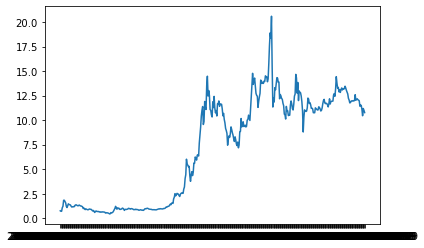

In [180]:
y=Y
eth_solana=eth_solana[['Solana_Marketcap', 'Solana_Close', 'Solana_Volume', 'Solana_Low', 'Solana_High','Date']]
plt.plot(eth_solana['Date'],y)

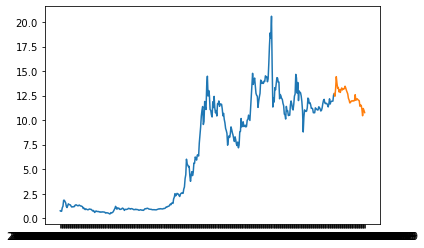

In [208]:
train=eth_solana.iloc[np.arange(0,eth_solana['Solana_Close'].count()*0.90)]
ytrain=y.iloc[np.arange(0,len(y)*0.90)]
ytest=y.iloc[np.arange(len(y)*0.90,len(y))]
test=eth_solana.iloc[np.arange(eth_solana['Solana_Close'].count()*0.90,eth_solana['Solana_Close'].count())]
plt.plot(train['Date'],ytrain,label='train')
plt.plot(test['Date'],ytest,label='test')

In [209]:
model=LinearRegression().fit(train.drop('Date',axis=1),ytrain)
predict=model.predict(test.drop('Date',axis=1))
model.score(train.drop('Date',axis=1),ytrain)

0.3478503003166824

In [210]:
model.score(test.drop('Date',axis=1),ytest)

-3.5204450094015787

KeyError: 'Date'

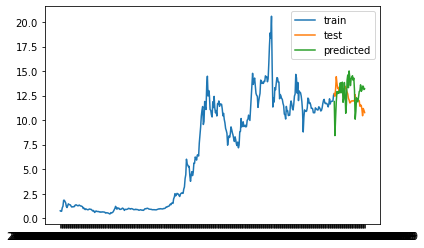

In [211]:
plt.plot(train['Date'],ytrain,label='train')
plt.plot(test['Date'],ytest,label='test')
plt.plot(test['Date'],predict,label='predicted')
plt.legend()